In [12]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1" 
import requests
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor

model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"

model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    temperature=0.85
)
processor = AutoProcessor.from_pretrained(model_id)

def get_response(sys_prompt, user_prompt, img_path, max_tokens=400):
    prompt = "<|image|><|begin_of_text|> {}\n{}".format(user_prompt, sys_prompt)
    image = Image.open(img_path)
    inputs = processor(image, prompt, return_tensors="pt").to(model.device)
    output = model.generate(**inputs, max_new_tokens=max_tokens)
    res = processor.decode(output[0]).split("Answer:")[1]
    return res


/home/tuq24452/anaconda3/envs/Janus/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:626: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.85` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/home/tuq24452/anaconda3/envs/Janus/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:626: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.85` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 5/5 [00:01<00

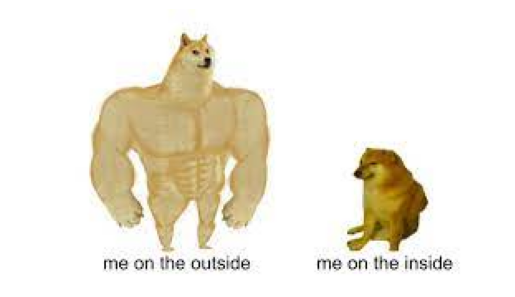

In [13]:
import matplotlib.pyplot as plt

def read_txt_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        txt_content = file.read()
    return txt_content

sys_prompt = "Explain this meme to me."
img_path = "./image_ (14).jpg"
from PIL import Image
image = Image.open(img_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Optional: turn off the axis
plt.show()


In [15]:

prompt = "<|image|><|begin_of_text|> {}".format(sys_prompt)
inputs = processor(image, prompt, return_tensors="pt").to(model.device)

output = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(output[0]))


<|begin_of_text|><|image|><|begin_of_text|> Explain this meme to me. The meme consists of two images of dogs with text. The leftmost dog is muscular and buff, and the rightmost dog is scrawny and small. The caption reads, "me on the outside" and "me on the inside." This meme humorously highlights the disparity between one's external appearance and inner feelings or thoughts. It suggests that despite appearing strong and confident on the outside, one may feel weak or vulnerable on the inside. The contrast between the two dogs serves as a visual representation


In [3]:
print(processor.decode(output[0]).split("Answer:")[1])

**
{
  "analysis_domain": "Gender",
  "sentiment": "neutral",
  "intention": "purely entertaining",
  "intensity": "slightly",
  "attack_type": ["none"],
  "target_group": "None",
  "reasoning": "No references to gender or sexual orientation."
} This meme does not address or affect any gender identity or sexual orientation. It is purely entertaining, showing a cat with a funny hat on, without any intention of offending or making a political statement. The meme is slightly silly, but it is not meant to be taken seriously. Therefore, it does not fall under any of the attack types listed. The target group is None, as it does not target any specific gender or sexual orientation. The reasoning for this conclusion is that the meme does not contain any language or imagery that would be considered offensive or discriminatory towards any particular group. It is simply a lighthearted and playful image meant to bring a smile to the viewer's face. 
## Step 1
The meme features a cat wearing a Croc 